In [13]:
import json

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from tqdm import tqdm

In [14]:
data = pd.read_csv('~/data/train.csv')
data.sample(10)

,id,source,sentence_1,sentence_2,label,binary-label
6813,boostcamp-sts-v1-train-6813,nsmc-sampled,그들의 노력에 박수를 보냅니다.,그들의 꿈과 열정에 박수를 보냅니다!,2.4,0.0
9190,boostcamp-sts-v1-train-9190,petition-sampled,경남제약을 상장유지 시켜주세요!,강소기업 경남제약 꼭 살려주세요.,2.4,0.0
1258,boostcamp-sts-v1-train-1258,petition-sampled,음주운전 모든 공직자와 국회의원 엄하게 처벌하기,- 대통령과 국회의원들의 부정과 비리를 엄하게 처벌하는 법을 제정하라 -,1.2,0.0
6876,boostcamp-sts-v1-train-6876,petition-rtt,"자살을 해도, 내 집에서 할 수 있게 해주세요",내가 자살하면 내 집에서 하게 해주세요,4.2,1.0
1765,boostcamp-sts-v1-train-1765,slack-rtt,최근에는 bts의 다이너마이트도 리메이크했습니다 ㅋ,최근에는 방탄소년단의 다이너마이트도 리메이크됐다.,3.4,1.0
2259,boostcamp-sts-v1-train-2259,petition-rtt,소액주주 천명 이상 기업에 대한 강제 상장 의무화,소액주주 1000명 이상 기업 상장 의무화,4.4,1.0
554,boostcamp-sts-v1-train-554,petition-sampled,정영식을 파면하라.한명숙판결과 동일한 잣대를 대하,정형식판사 파면 12만명 청원주소.. 특검과 파면 신청합니다.,1.8,0.0
6571,boostcamp-sts-v1-train-6571,slack-sampled,와 인턴분들 대단하다… 부트캠프 졸업생들 대단하다… 생각만 계속 했었습니다.,부트캠프 출신 인턴분들이 30-60-90이 얼마 남지 않아서 다들 바쁘신 것 같습니다.,1.2,0.0
6249,boostcamp-sts-v1-train-6249,petition-sampled,빗썸에 대한 공식적인 조사를 청원합니다.,대한항공에 대한 조사가 아닌 수사를 요청합니다.,0.2,0.0
8474,boostcamp-sts-v1-train-8474,slack-rtt,확인 부탁드립니다.,확인해주십시오.,4.0,1.0


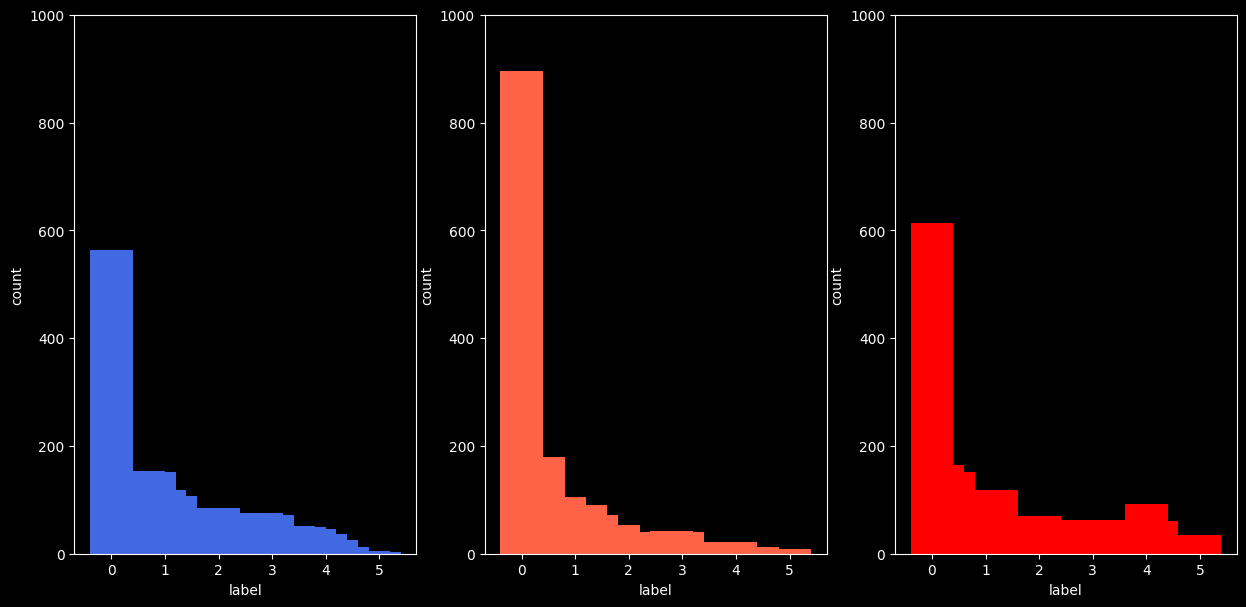

In [15]:
gb_source = data.groupby('source')['label'].value_counts()
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
axes[0].bar(gb_source['nsmc-sampled'].index, gb_source['nsmc-sampled'], color='royalblue')
axes[1].bar(gb_source['slack-sampled'].index, gb_source['slack-sampled'], color='tomato')
axes[2].bar(gb_source['petition-sampled'].index, gb_source['petition-sampled'], color='red')
for ax in axes:
    ax.set_ylim(0,1000)
    ax.set_xlabel('label')
    ax.set_ylabel('count')
plt.show()

In [16]:
label_0_all = data[data['label'] == 0]
display(label_0_all)

,id,source,sentence_1,sentence_2,label,binary-label
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
14,boostcamp-sts-v1-train-014,slack-sampled,아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.,여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.,0.0,0.0
19,boostcamp-sts-v1-train-019,petition-sampled,내년 러시아월드컵 자진포기 청원드립니다.,2023 아시안컵 유치에 공동개최를 반대 합니다.,0.0,0.0
20,boostcamp-sts-v1-train-020,slack-sampled,앞머리 새로 하셨습니다. ^^,가방에 넣어 다니면서 조금씩 먹습니다. ^^,0.0,0.0
22,boostcamp-sts-v1-train-022,slack-sampled,답답할 때 보면 속이 뻥 뚫릴 것 같아요,양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ,0.0,0.0
...,...,...,...,...,...,...
9274,boostcamp-sts-v1-train-9274,nsmc-sampled,영화괜찮았구만 난리들이네 -_-,대만박스오피스 1위 대만 클라스 보소 -_-;;,0.0,0.0
9278,boostcamp-sts-v1-train-9278,petition-sampled,대한민국 정치인이 참~~~,조국아~~~조국아~~~나의 조국아~~~,0.0,0.0
9308,boostcamp-sts-v1-train-9308,slack-sampled,베이비 필터 끼우고 찍어봤습니당.,넘넘 반가웠습니당.,0.0,0.0
9313,boostcamp-sts-v1-train-9313,nsmc-sampled,엘호야때문에보긴하지만...루즈한감있습니다..,..글쎄다...쇼킹하긴하지만 노골적으로 할필요까진..;; 엽기적이다.,0.0,0.0


In [17]:
label_0 = data[data['label'] == 0].sample(n=1000)
label_n = data[data['label'] != 0]
new_data = pd.concat([label_0, label_n])
display(new_data)

,id,source,sentence_1,sentence_2,label,binary-label
6077,boostcamp-sts-v1-train-6077,slack-sampled,"엇 절이라그래서 막 한옥집,기와 이런거 생각했는데 무척 현대적이네요ㅎㅎㅎ","어머 저 여기 좋아해서, 막 생일날 엄마아빠랑 가고 그랬는데 사라져서 섭섭했어요!",0.0,0.0
5686,boostcamp-sts-v1-train-5686,nsmc-sampled,루이즈 보르고앙은 숨막히게 아름다웠지만 영화는 그녀를 빛좋은 개살구로 만들었다.,"화면은 아름다웠지만, 쏟아지는 졸음은 어쩔수 없다",0.0,0.0
3365,boostcamp-sts-v1-train-3365,nsmc-sampled,일본계 판타지들은 신비하다기 보단 괴상한 느낌이...,개인적으로 무섭다기보다는 좀 슬펐다...,0.0,0.0
91,boostcamp-sts-v1-train-091,petition-sampled,이민을 허용해주세요,소년법을 폐지해주세요.,0.0,0.0
7564,boostcamp-sts-v1-train-7564,slack-sampled,여러 생각을 하게 만드는 군요!!,작은 건데 참 설레게 만드는~,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


In [18]:
display(data)

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


In [19]:
label_0 = new_data[new_data['label'] == 0]
display(label_0)

,id,source,sentence_1,sentence_2,label,binary-label
6077,boostcamp-sts-v1-train-6077,slack-sampled,"엇 절이라그래서 막 한옥집,기와 이런거 생각했는데 무척 현대적이네요ㅎㅎㅎ","어머 저 여기 좋아해서, 막 생일날 엄마아빠랑 가고 그랬는데 사라져서 섭섭했어요!",0.0,0.0
5686,boostcamp-sts-v1-train-5686,nsmc-sampled,루이즈 보르고앙은 숨막히게 아름다웠지만 영화는 그녀를 빛좋은 개살구로 만들었다.,"화면은 아름다웠지만, 쏟아지는 졸음은 어쩔수 없다",0.0,0.0
3365,boostcamp-sts-v1-train-3365,nsmc-sampled,일본계 판타지들은 신비하다기 보단 괴상한 느낌이...,개인적으로 무섭다기보다는 좀 슬펐다...,0.0,0.0
91,boostcamp-sts-v1-train-091,petition-sampled,이민을 허용해주세요,소년법을 폐지해주세요.,0.0,0.0
7564,boostcamp-sts-v1-train-7564,slack-sampled,여러 생각을 하게 만드는 군요!!,작은 건데 참 설레게 만드는~,0.0,0.0
...,...,...,...,...,...,...
8433,boostcamp-sts-v1-train-8433,slack-sampled,믱 ;ㅁ; 시간이 없어서 시도도 사실 못해봐서...,앜ㅋㅋ아쉽게도 어려서부터 운동을 기피해와서...,0.0,0.0
3169,boostcamp-sts-v1-train-3169,slack-sampled,빨리 돈받아 오거나 벌어 오겠습니다!,따로 한마리 보내드리겠습니다!!!!,0.0,0.0
1490,boostcamp-sts-v1-train-1490,slack-sampled,헐.... 심각한 이야기라 이런 말 하기 쫌 그렇지만...사진만 보면 재첩국...,대박.... 한번 할 때 얼마나 틀어놓나욬ㅋㅋ,0.0,0.0
651,boostcamp-sts-v1-train-651,slack-sampled,아직 ; 벌써 백일인게 신기하고 자랑스럽습니당,선약이 있지만 너무 아쉽습니당,0.0,0.0


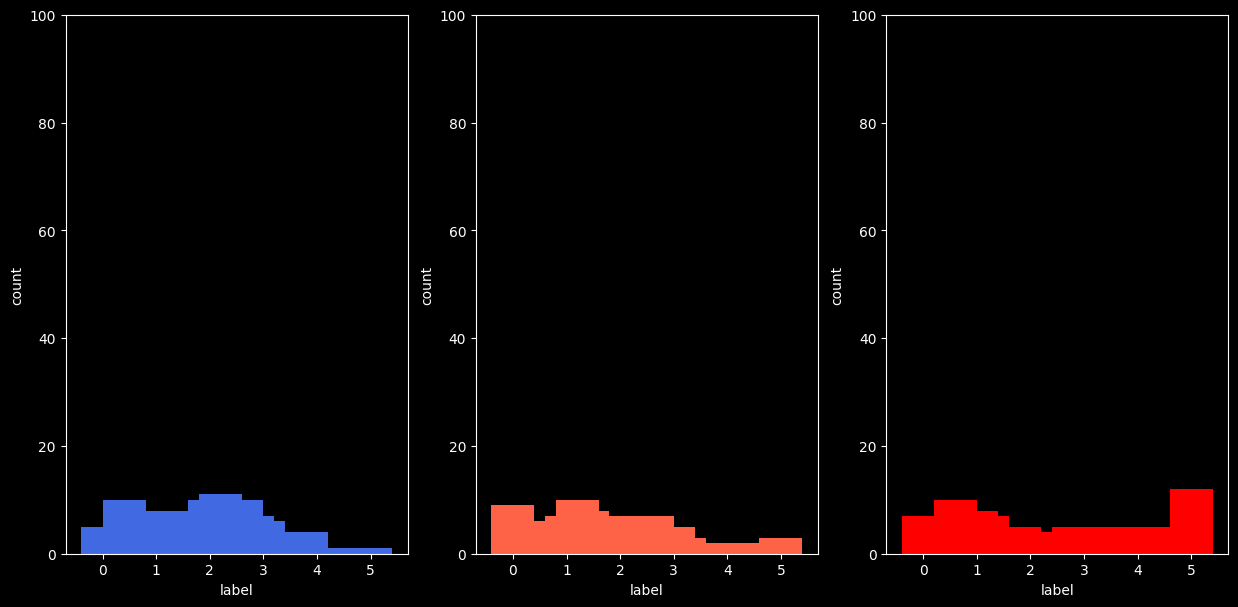

In [21]:
val_data = pd.read_csv('~/data/dev.csv')
gb_source = val_data.groupby('source')['label'].value_counts()
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
axes[0].bar(gb_source['nsmc-sampled'].index, gb_source['nsmc-sampled'], color='royalblue')
axes[1].bar(gb_source['slack-sampled'].index, gb_source['slack-sampled'], color='tomato')
axes[2].bar(gb_source['petition-sampled'].index, gb_source['petition-sampled'], color='red')
for ax in axes:
    ax.set_ylim(0,100)
    ax.set_xlabel('label')
    ax.set_ylabel('count')
plt.show()

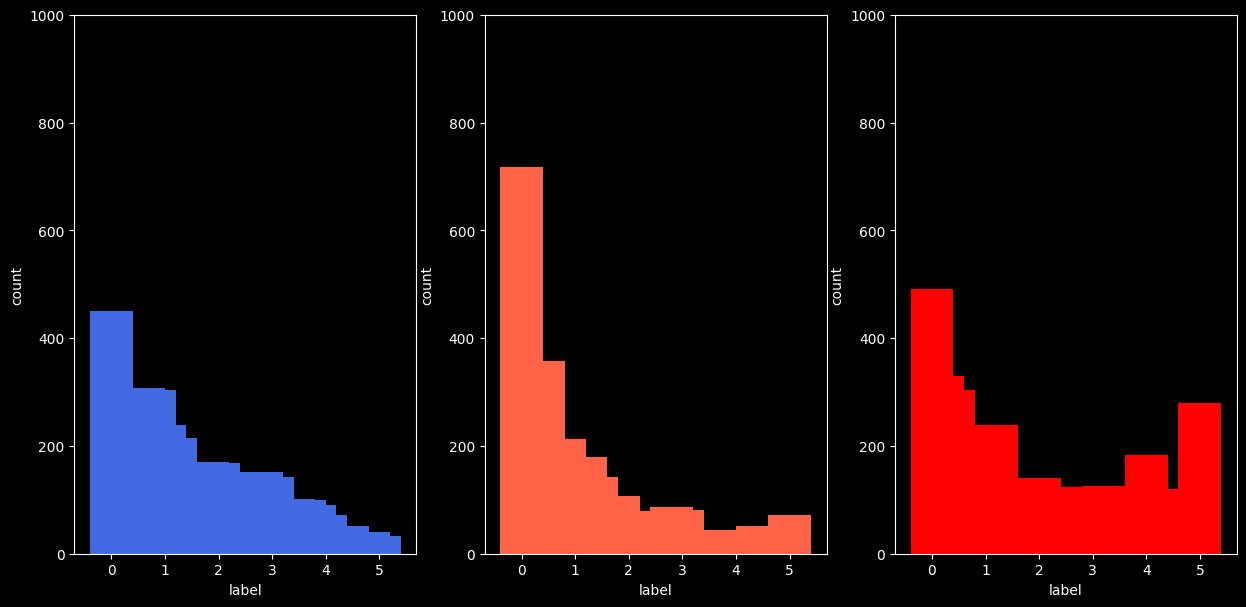

In [22]:
new_data = pd.read_csv('~/data/train_resampled_swap.csv')
new_data.sample(10)
gb_source = new_data.groupby('source')['label'].value_counts()
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
axes[0].bar(gb_source['nsmc-sampled'].index, gb_source['nsmc-sampled'], color='royalblue')
axes[1].bar(gb_source['slack-sampled'].index, gb_source['slack-sampled'], color='tomato')
axes[2].bar(gb_source['petition-sampled'].index, gb_source['petition-sampled'], color='red')
for ax in axes:
    ax.set_ylim(0,1000)
    ax.set_xlabel('label')
    ax.set_ylabel('count')
plt.show()

In [ ]:
print(new_data[new_data['label']==0].value_counts())

id                           source            sentence_1                                                sentence_2                                               label  binary-label
boostcamp-sts-v1-train-019   petition-sampled  2023 아시안컵 유치에 공동개최를 반대 합니다.                               내년 러시아월드컵 자진포기 청원드립니다.                                   0.0    0.0             1
boostcamp-sts-v1-train-6611  slack-sampled     몇주 뒤 2월 중순쯤, 졸업과 전문연 편입이 완료되시고 나면 오피스에서 자주 뵐수 있을 것 같습니다!  많이 늦어지시면 미팅을 약 5-10분 정도 늦추는 것도 방법일 수 있을 것 같습니다!          0.0    0.0             1
boostcamp-sts-v1-train-6606  petition-sampled  주제ㅡ안양 호계2동 호계온천지구 재개발의 황당무계한 제도와 체계의 폐단을 근절시켜 주시기 바랍나다.   HUG주택도시보증공사는 대구 수성W의 분양가를 현실에 맞게 합리적으로 책정해 주시기 바랍니다.     0.0    0.0             1
                                               HUG주택도시보증공사는 대구 수성W의 분양가를 현실에 맞게 합리적으로 책정해 주시기 바랍니다.      주제ㅡ안양 호계2동 호계온천지구 재개발의 황당무계한 제도와 체계의 폐단을 근절시켜 주시기 바랍나다.  0.0    0.0             1
boostcamp-sts-v1-train-6601  nsmc-sampled      애들이 많이 불쌍...           